In [94]:
import pandas as pd
df=pd.read_csv("youtube_ad_revenue_dataset.csv")
df

,video_id,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd
0,vid_3092,2024-09-24 10:50:40.993199,9936,1221.0,320.0,26497.214184,2.862137,228086,Entertainment,TV,IN,203.178237
1,vid_3459,2024-09-22 10:50:40.993199,10017,642.0,346.0,15209.747445,23.738069,736015,Gaming,Tablet,CA,140.880508
2,vid_4784,2024-11-21 10:50:40.993199,10097,1979.0,187.0,57332.658498,26.200634,240534,Education,TV,CA,360.134008
3,vid_4078,2025-01-28 10:50:40.993199,10034,1191.0,242.0,31334.517771,11.770340,434482,Entertainment,Mobile,UK,224.638261
4,vid_3522,2025-04-28 10:50:40.993199,9889,1858.0,477.0,15665.666434,6.635854,42030,Education,Mobile,CA,165.514388
...,...,...,...,...,...,...,...,...,...,...,...,...
122395,vid_2902,2024-12-14 10:50:40.993199,9853,1673.0,147.0,42075.704885,25.490195,210818,Education,Tablet,US,280.986396
122396,vid_3890,2024-07-13 10:50:40.993199,10128,1709.0,63.0,57563.703040,16.229133,878860,Music,Desktop,UK,354.612981
122397,vid_3934,2024-06-10 10:50:40.993199,10267,700.0,NaN,27549.714659,23.822365,576756,Tech,Tablet,CA,203.643106
122398,vid_4260,2024-12-22 10:50:40.993199,10240,1616.0,106.0,56967.384382,7.753099,585138,Music,Mobile,UK,351.525811


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   video_id              122400 non-null  object 
 1   date                  122400 non-null  object 
 2   views                 122400 non-null  int64  
 3   likes                 116283 non-null  float64
 4   comments              116288 non-null  float64
 5   watch_time_minutes    116295 non-null  float64
 6   video_length_minutes  122400 non-null  float64
 7   subscribers           122400 non-null  int64  
 8   category              122400 non-null  object 
 9   device                122400 non-null  object 
 10  country               122400 non-null  object 
 11  ad_revenue_usd        122400 non-null  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 11.2+ MB


In [96]:
df["video_id"]=df["video_id"].astype(str).str.strip("vid_").astype(int)
df["date"] = pd.to_datetime(df["date"], errors="coerce")

In [97]:
df["category"].unique()

array(['Entertainment', 'Gaming', 'Education', 'Music', 'Tech',
       'Lifestyle'], dtype=object)

In [98]:
df["device"].unique()

array(['TV', 'Tablet', 'Mobile', 'Desktop'], dtype=object)

In [99]:
df["country"].unique()

array(['IN', 'CA', 'UK', 'US', 'DE', 'AU'], dtype=object)

In [100]:
from sklearn.preprocessing import OrdinalEncoder

cat_cols = ["category", "device", "country"]

encoder = OrdinalEncoder()
df[cat_cols] = encoder.fit_transform(df[cat_cols])

In [101]:
df.isnull().sum()

video_id                   0
date                       0
views                      0
likes                   6117
comments                6112
watch_time_minutes      6105
video_length_minutes       0
subscribers                0
category                   0
device                     0
country                    0
ad_revenue_usd             0
dtype: int64

In [102]:
df["watch_time_minutes"] = df["watch_time_minutes"].round(2)
df["video_length_minutes"] = df["video_length_minutes"].round(2)

In [103]:
df["likes"]=df["likes"].fillna(0)
df["comments"]=df["comments"].fillna(0)
df["watch_time_minutes"]=df["watch_time_minutes"].fillna(df["watch_time_minutes"].median())

In [104]:
df.duplicated().sum()

np.int64(2400)

In [105]:
df = df.drop_duplicates(subset=["video_id", "date"],keep="first")
df = df.reset_index(drop=True)

In [106]:
import numpy as np
df["engagement"] = (df["likes"] + df["comments"]) / df["views"].replace(0, np.nan)
df["watch_per_view"] = df["watch_time_minutes"] / df["views"].replace(0, np.nan)
df["views_per_min"] = df["views"] / df["video_length_minutes"].replace(0, np.nan)
df["upload_month"] = df["date"].dt.month
df["upload_day"]   = df["date"].dt.day
df["upload_year"]  = df["date"].dt.year

In [107]:
df.fillna(0, inplace=True)

In [108]:
df.set_index("video_id",inplace=True)
df=df.drop("date",axis=1)

In [109]:
df

,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd,engagement,watch_per_view,views_per_min,upload_month,upload_day,upload_year
video_id,,,,,,,,,,,,,,,,
3092,9936,1221.0,320.0,26497.21,2.86,228086,1.0,2.0,3.0,203.178237,0.155093,2.666788,3474.125874,9,24,2024
3459,10017,642.0,346.0,15209.75,23.74,736015,2.0,3.0,1.0,140.880508,0.098632,1.518394,421.946083,9,22,2024
4784,10097,1979.0,187.0,57332.66,26.20,240534,0.0,2.0,1.0,360.134008,0.214519,5.678188,385.381679,11,21,2024
4078,10034,1191.0,242.0,31334.52,11.77,434482,1.0,1.0,4.0,224.638261,0.142814,3.122834,852.506372,1,28,2025
3522,9889,1858.0,477.0,15665.67,6.64,42030,0.0,1.0,1.0,165.514388,0.236121,1.584151,1489.307229,4,28,2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4483,9841,1638.0,323.0,26845.64,4.99,637259,2.0,0.0,4.0,211.544626,0.199268,2.727938,1972.144289,3,21,2025
2902,9853,1673.0,147.0,42075.70,25.49,210818,0.0,3.0,5.0,280.986396,0.184715,4.270344,386.543743,12,14,2024
3890,10128,1709.0,63.0,57563.70,16.23,878860,4.0,0.0,4.0,354.612981,0.174961,5.683620,624.029575,7,13,2024


In [110]:
df.corr()

,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd,engagement,watch_per_view,views_per_min,upload_month,upload_day,upload_year
views,1.000000,0.013542,0.014409,0.025364,0.000660,0.000589,-0.002189,-0.006668,-0.000837,0.037315,-0.005972,-0.004315,0.009269,0.004247,0.003738,-0.007645
likes,0.013542,1.000000,-0.006161,0.001847,0.000848,0.005888,0.000101,0.004949,0.001148,0.128389,0.969915,0.001440,0.000020,0.006636,0.002375,-0.006494
comments,0.014409,-0.006161,1.000000,-0.002152,-0.000197,-0.001165,0.001195,0.002865,-0.000551,0.028130,0.236205,-0.002557,0.000107,0.005380,0.003992,-0.004721
watch_time_minutes,0.025364,0.001847,-0.002152,1.000000,0.000062,0.004284,0.002938,0.002156,0.002505,0.964090,0.000699,0.999510,0.002821,-0.001166,-0.001498,0.002533
video_length_minutes,0.000660,0.000848,-0.000197,0.000062,1.000000,0.001494,-0.004190,0.000159,-0.001346,0.000718,0.000783,0.000049,-0.791371,0.005424,0.002684,-0.005552
subscribers,0.000589,0.005888,-0.001165,0.004284,0.001494,1.000000,0.004873,-0.000823,0.000368,0.004676,0.005433,0.004259,-0.001465,0.001721,-0.000274,-0.002142
category,-0.002189,0.000101,0.001195,0.002938,-0.004190,0.004873,1.000000,0.004146,0.000067,0.002744,0.000426,0.003059,0.002849,-0.001289,-0.002966,0.001043
device,-0.006668,0.004949,0.002865,0.002156,0.000159,-0.000823,0.004146,1.000000,0.003355,0.002062,0.005665,0.002356,0.000288,0.000725,0.000844,-0.002764
country,-0.000837,0.001148,-0.000551,0.002505,-0.001346,0.000368,0.000067,0.003355,1.000000,0.002140,0.001026,0.002537,0.002388,0.000311,-0.002808,-0.001438
ad_revenue_usd,0.037315,0.128389,0.028130,0.964090,0.000718,0.004676,0.002744,0.002062,0.002140,1.000000,0.130744,0.963236,0.003113,-0.000091,-0.001493,0.001722


In [111]:
continous=["views","likes","comments","watch_time_minutes","video_length_minutes","subscribers","ad_revenue_usd","engagement","watch_per_view","views_per_min"]
category=["category","device","country","upload_month","upload_day","upload_year"]

In [112]:
from scipy import stats
#continous vs continous (two sample)
def continous_continous(col1,col2):
    t=0
    f=0
    for i in range(1,31):
        samp1=df[col1].sample(frac=0.03)
        samp2=df[col2].sample(frac=0.03)
        t_test,p_value=stats.ttest_ind(samp1,samp2)
        if p_value <0.02:
            t=t+1
        else:
            f=f+1
    if t>f:
        return True
    else:
        return False   

In [113]:
continous_continous("likes","watch_time_minutes")

True

In [114]:
#continous(col1) vs category(col2) ANNOVA test
def continous_vs_category(col1,col2):
  group=df[col2].unique()
  data={}
  for i in group:
    data[i]=df[col1][df[col2]==i]
  fvalue,pvalue=stats.f_oneway(*[i for i in data.values()])
  return False if pvalue<0.02 else True

In [115]:
continous_vs_category("likes","category")

True

In [116]:
#category_vs_category  chi2_contingency
def category_vs_category(col1,col2):
    return True if stats.chi2_contingency(pd.crosstab(df[col1],df[col2]))[1] < 0.02 else False #0-fvalue, 1-pvalue,2-dof,3-matrix

In [117]:
category_vs_category("device","country")

False

In [118]:
final={}
for i in df.columns:
  final[i]={}
  for j in df.columns:
    if i == j:
            final[i][j] = 0  # No self-comparison
            continue
    if (i in continous) and (j in continous):
      result=continous_continous(i,j)
    elif (i in continous) and (j in category):
      result=continous_vs_category(i,j)
    elif (i in category) and (j in continous):
      result=continous_vs_category(j,i)
    elif (i in category) and (j in category):
      result=category_vs_category(i,j)
    else:
            result = False  # Catch all unmatched types

    final[i][j] = int(result)

In [119]:
final_df=pd.DataFrame(final)
final_df

,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd,engagement,watch_per_view,views_per_min,upload_month,upload_day,upload_year
views,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
likes,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
comments,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1
watch_time_minutes,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1
video_length_minutes,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1
subscribers,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1
category,1,1,1,1,1,1,0,0,0,1,1,1,1,0,0,0
device,1,1,1,1,1,1,0,0,0,1,1,1,1,0,0,0
country,1,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0
ad_revenue_usd,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1


<Axes: >

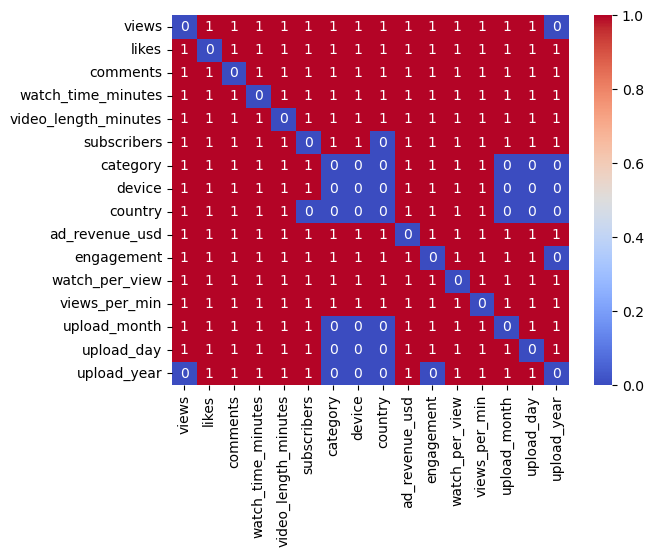

In [120]:
import seaborn as sns
sns.heatmap(final_df,annot=True,cmap="coolwarm")

In [121]:
#step1 - identity df["column"].skew()     high flow in x
#case1 - output in between -0.5 to 0.5 - less skewness so no need to transform that column
#case2 - output in between -1 to -0.5 or 0.5 to 1 - moderately skewed transform the column can be considered
#case3 - output >1 or <-1 - highly skewed so need to transform the data.(note: count of data is greater it must to considered else it can be consider)

#step2 - identity kurtosis(df["column"])  high flow in y
#case1 - output in between -3 to 3 - less kurtosis so no need to transform that column
#case2 - output in between -6 to -3 or 3 to 6 - moderately kurtosis transform the column can be considered
#case3 - output >6 or <-6 - highly kurtosis so need to transform the data.(note: count of data is greater it must to considered else it can be consider)

In [122]:
# Calculating skewness and kurtosis for each column
for i in df.columns:
  print(i,df[i].skew(),df[i].kurtosis())

views -0.0035156535823410904 0.011436331227211216
likes -0.0840456222701939 -1.0845021734658116
comments -0.07455801777339388 -1.077795798160217
watch_time_minutes 0.0011588771807642506 -1.1007980213966986
video_length_minutes -0.0003623999154687683 -1.2026196086715624
subscribers -0.008701483687810608 -1.197612168997451
category 0.0012976280371300728 -1.2730138454302216
device -0.0007181593565170011 -1.3582510855147742
country 0.006873459946501714 -1.2613019473954914
ad_revenue_usd 0.0010606110506798591 -1.1409261632917218
engagement -0.07837382241750951 -0.9659083999239444
watch_per_view -0.000653519179538529 -1.1036527079040972
views_per_min 2.2773947054912163 5.312102932239371
upload_month -0.011031051115712487 -1.2083644517533378
upload_day 0.010564257174075206 -1.191654009052592
upload_year 0.2608751317194333 -1.931977432598688


In [123]:
for i in df.columns:
  if df[i].skew()<0.5 and df[i].skew()>-0.5 and df[i].kurtosis()<3 and df[i].kurtosis()>-3:
    continue
  print(i)
  method=[0,0.5,-0.5,1,-1,2,-2]

  for j in method:
    print(j)
    print("Skewness",pd.DataFrame(stats.boxcox(df[i],lmbda=j)).skew().values,"Kurtosis",pd.DataFrame(stats.boxcox(df[i],lmbda=j)).kurtosis().values)

views_per_min
0
Skewness [0.90539015] Kurtosis [-0.02359364]
0.5
Skewness [1.5427486] Kurtosis [1.94230475]
-0.5
Skewness [0.39547413] Kurtosis [-0.92643846]
1
Skewness [2.27739471] Kurtosis [5.31210293]
-1
Skewness [-0.00093153] Kurtosis [-1.20074539]
2
Skewness [3.77264277] Kurtosis [15.72012569]
-2
Skewness [-0.56962859] Kurtosis [-0.92895342]


In [124]:
from scipy import special
df['views_per_min'] = special.boxcox1p(df['views_per_min'], -1)
df

,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd,engagement,watch_per_view,views_per_min,upload_month,upload_day,upload_year
video_id,,,,,,,,,,,,,,,,
3092,9936,1221.0,320.0,26497.21,2.86,228086,1.0,2.0,3.0,203.178237,0.155093,2.666788,0.999712,9,24,2024
3459,10017,642.0,346.0,15209.75,23.74,736015,2.0,3.0,1.0,140.880508,0.098632,1.518394,0.997636,9,22,2024
4784,10097,1979.0,187.0,57332.66,26.20,240534,0.0,2.0,1.0,360.134008,0.214519,5.678188,0.997412,11,21,2024
4078,10034,1191.0,242.0,31334.52,11.77,434482,1.0,1.0,4.0,224.638261,0.142814,3.122834,0.998828,1,28,2025
3522,9889,1858.0,477.0,15665.67,6.64,42030,0.0,1.0,1.0,165.514388,0.236121,1.584151,0.999329,4,28,2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4483,9841,1638.0,323.0,26845.64,4.99,637259,2.0,0.0,4.0,211.544626,0.199268,2.727938,0.999493,3,21,2025
2902,9853,1673.0,147.0,42075.70,25.49,210818,0.0,3.0,5.0,280.986396,0.184715,4.270344,0.997420,12,14,2024
3890,10128,1709.0,63.0,57563.70,16.23,878860,4.0,0.0,4.0,354.612981,0.174961,5.683620,0.998400,7,13,2024


In [125]:
# Calculating skewness and kurtosis for each column
for i in df.columns:
  print(i,df[i].skew(),df[i].kurtosis())

views -0.0035156535823410904 0.011436331227211216
likes -0.0840456222701939 -1.0845021734658116
comments -0.07455801777339388 -1.077795798160217
watch_time_minutes 0.0011588771807642506 -1.1007980213966986
video_length_minutes -0.0003623999154687683 -1.2026196086715624
subscribers -0.008701483687810608 -1.197612168997451
category 0.0012976280371300728 -1.2730138454302216
device -0.0007181593565170011 -1.3582510855147742
country 0.006873459946501714 -1.2613019473954914
ad_revenue_usd 0.0010606110506798591 -1.1409261632917218
engagement -0.07837382241750951 -0.9659083999239444
watch_per_view -0.000653519179538529 -1.1036527079040972
views_per_min 0.0010048313822511865 -1.2007427904605903
upload_month -0.011031051115712487 -1.2083644517533378
upload_day 0.010564257174075206 -1.191654009052592
upload_year 0.2608751317194333 -1.931977432598688


In [126]:
def classify_outliers(df):
    df = df.copy()
    
    # Rule 1: Impossible values = TRUE ANOMALY
    df["outlier_type"] = "normal"
    df.loc[df["views"] < 0, "outlier_type"] = "error"
    df.loc[df["likes"] < 0, "outlier_type"] = "error"
    df.loc[df["comments"] < 0, "outlier_type"] = "error"
    df.loc[df["ad_revenue_usd"] < 0, "outlier_type"] = "error"

    # Rule 2: Viral content = "viral"
    # Define thresholds, e.g., top 1% of views
    views_threshold = df["views"].quantile(0.99)
    likes_threshold = df["likes"].quantile(0.99)
    
    df.loc[
        (df["views"] > views_threshold) | 
        (df["likes"] > likes_threshold), 
        "outlier_type"
    ] = "viral"

    # Rule 3: Logical inconsistencies = "error"
    df.loc[df["likes"] > df["views"], "outlier_type"] = "error"
    df.loc[df["comments"] > df["views"], "outlier_type"] = "error"
    
    return df

In [127]:
classified_df = classify_outliers(df)

classified_df["outlier_type"].value_counts()

outlier_type
normal    113895
viral       2256
Name: count, dtype: int64

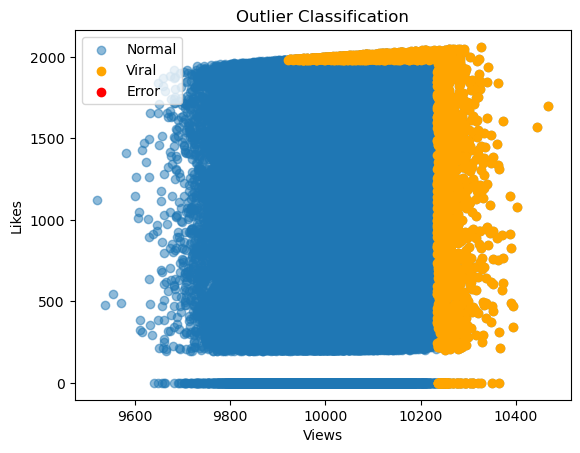

In [128]:
import matplotlib.pyplot as plt

plt.scatter(df["views"], df["likes"], alpha=0.5, label="Normal")
plt.scatter(
    classified_df.loc[classified_df["outlier_type"]=="viral", "views"], 
    classified_df.loc[classified_df["outlier_type"]=="viral", "likes"], 
    color="orange", label="Viral"
)
plt.scatter(
    classified_df.loc[classified_df["outlier_type"]=="error", "views"], 
    classified_df.loc[classified_df["outlier_type"]=="error", "likes"], 
    color="red", label="Error"
)
plt.xlabel("Views")
plt.ylabel("Likes")
plt.legend()
plt.title("Outlier Classification")
plt.show()

In [129]:
x=df.drop(columns=["ad_revenue_usd"],axis=1)
y=df["ad_revenue_usd"]

In [130]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((92920, 15), (23231, 15), (92920,), (23231,))

In [131]:
import joblib
feature_names = x_train.columns.tolist()
joblib.dump(feature_names, "feature_names.pkl")

['feature_names.pkl']

In [132]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled  = scaler.transform(x_test)

In [138]:
import time
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import(r2_score, mean_squared_error, mean_absolute_error)

def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mask = y_true != 0
    return (np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100) if mask.sum() > 0 else np.nan

models = {
    "LinearRegression": LinearRegression(),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "RandomForest": RandomForestRegressor(random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

results = {}
for name, model in models.items():
    start = time.time()
    model.fit(x_train_scaled, y_train)
    preds = model.predict(x_test_scaled)
    elapsed = time.time() - start
    results[name] = {
        "R2": r2_score(y_test, preds),
        "RMSE": np.sqrt(mean_squared_error(y_test, preds)),
        "MAE": mean_absolute_error(y_test, preds),
    }

results_df = pd.DataFrame(results).T.sort_values("R2", ascending=False)
print(results_df)

                        R2       RMSE       MAE
GradientBoosting  0.951116  13.704067  3.773626
LinearRegression  0.947741  14.169311  4.831258
RandomForest      0.947709  14.173625  3.623275
XGBoost           0.947271  14.232827  4.400209
DecisionTree      0.893286  20.247775  5.383059


C:\Users\Priya Roshini\AppData\Local\Temp\ipykernel_20976\4069367589.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=plot_df, palette="viridis")
C:\Users\Priya Roshini\AppData\Local\Temp\ipykernel_20976\4069367589.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=plot_df, palette="viridis")
C:\Users\Priya Roshini\AppData\Local\Temp\ipykernel_20976\4069367589.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=plot_df, palette="viridis")


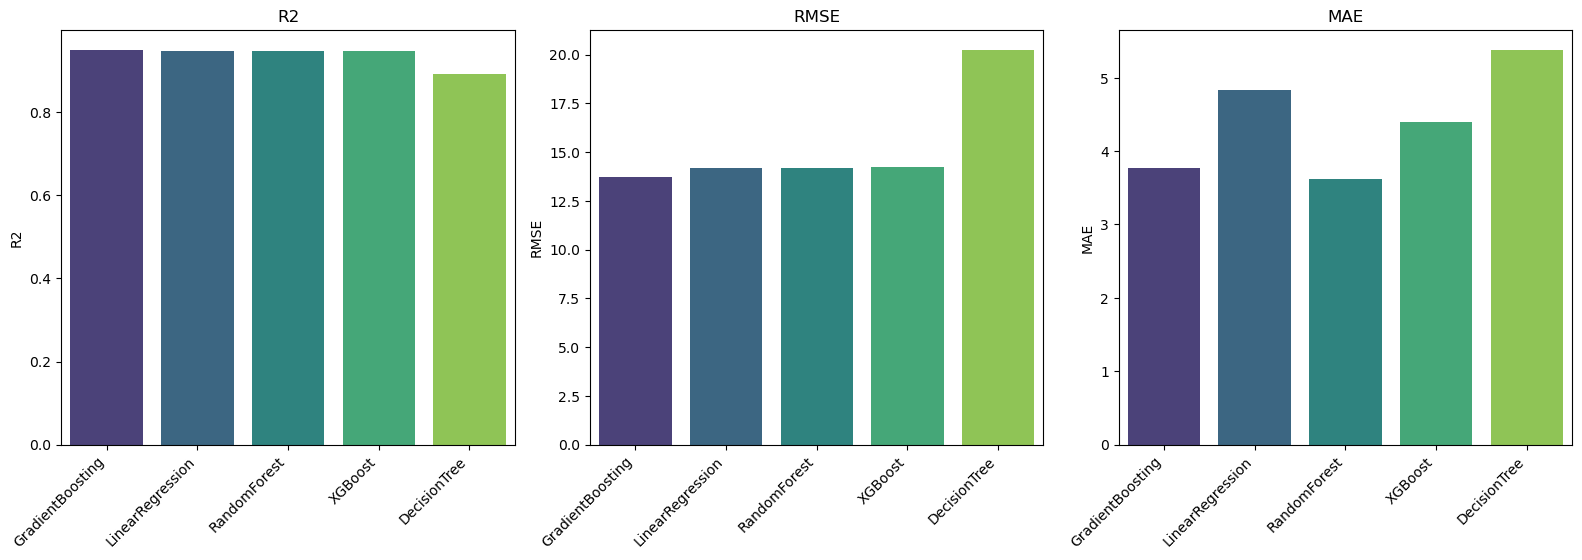

In [140]:
# reset index so "Model" is a column
plot_df = results_df.reset_index().rename(columns={"index": "Model"})

metrics = ["R2", "RMSE", "MAE"]

plt.figure(figsize=(16,10))

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 3, i)   # 2 rows, 3 cols
    sns.barplot(x="Model", y=metric, data=plot_df, palette="viridis")
    plt.xticks(rotation=45, ha="right")
    plt.title(metric)
    plt.xlabel("")
    plt.ylabel(metric)

plt.tight_layout()
plt.show()

In [143]:
from sklearn.model_selection import RandomizedSearchCV

xgb_model = XGBRegressor(random_state=42)

xgb_param_grid = {
    "n_estimators": [100, 200, 300, 500],
    "max_depth": [3, 5, 7, 9],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "gamma": [0, 0.1, 0.2]
}

xgb_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=xgb_param_grid,
    n_iter=30,
    scoring="r2",
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

xgb_search.fit(x_train_scaled, y_train)   # <-- scaled input

print("Best XGBoost Params:", xgb_search.best_params_)
print("Best XGBoost R²:", xgb_search.best_score_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best XGBoost Params: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.8}
Best XGBoost R²: 0.949683505907599


In [144]:
best_xgb = XGBRegressor(
    **xgb_search.best_params_,
    random_state=42,
    n_jobs=-1
)
best_xgb.fit(x_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=-1, num_parallel_tree=None, ...)

In [151]:
y_pred = best_xgb.predict(x_test_scaled)

print("Test R²:", r2_score(y_test, y_pred))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Test MAE:", mean_absolute_error(y_test, y_pred))

Test R²: 0.9510178819393968
Test RMSE: 13.717826079270079
Test MAE: 3.698656426454277


In [152]:
joblib.dump(best_xgb,"best_gb_model.pkl")

['best_gb_model.pkl']

In [153]:
joblib.dump(encoder, "ordinal_encoder.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']